# Comprehensive Crime Analysis and Prediction in São Paulo

## Introduction
The project aims to analyze crime data in São Paulo, identify trends and patterns, and develop predictive models to forecast future crime occurrences. The project will also explore the socio-economic factors influencing crime rates and provide actionable insights for policymakers.

## Data Collection and Preprocessing

### 1. Handle Missing Values and Inconsistencies

In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv('dataset-limpo.csv')

data.head(5)

,id,bairro,created_at,descricao,endereco,id.1,ip_address_origin,latitude,longitude,registrou_bo,...,Estepe,MP4 ou Ipod,Móveis,Notebook,Outros,Relógio,Som,Tablet,Tv,time
0,49787,Butantã,2015-06-16 23:34:01.000,"5 bandidos, armas, entraram em casa e vasculha...","Avenida Trona Constanzo, 177, Butantã",49787,NaN,-23.580973,-46.719192,True,...,NaN,True,NaN,True,NaN,NaN,True,True,True,2010-12-20 20:30:00.000
1,10679,Itaquera,2013-09-11 18:26:31.819,"Meu caso foi para o Pequenas Causas, ganhamos ...","Avenida José Pinheiro Borges, 450-876 - Itaque...",10679,187.11.1.51,-23.540105,-46.462872,True,...,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,2012-01-11 14:00:00.000
2,10682,Itaquera,2013-09-11 18:42:07.858,"Meu caso foi para o Pequenas Causas, ganhamos ...",Rua Corínthians - Itaquera - Shopping Metrô It...,10682,189.19.160.82,-23.541765,-46.469562,True,...,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,2012-01-11 14:00:00.000
3,6166,Morumbi,2013-08-20 11:56:52.717,"Estava parada no semáforo, o bandido veio e es...","Rua Pasquale Gallupi, 347 - Morumbi, São Paulo...",6166,199.67.140.46,-23.611693,-46.725935,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012-01-11 18:20:00.000
4,6521,Alto de Pinheiros,2013-08-20 17:41:21.569,Arrombaram o porta malas do meu carro e levara...,"Avenida Professor Fonseca Rodrigues, 1655 - Al...",6521,187.92.158.154,-23.544564,-46.721567,True,...,NaN,NaN,NaN,True,True,NaN,NaN,NaN,NaN,2012-01-11 08:15:00.000


In [ ]:

# Checking for missing values
missing_values = data.isnull().sum()
missing_values

id                        0
bairro                 1703
created_at                0
descricao                 1
endereco                  0
id.1                      0
ip_address_origin      1194
latitude                  0
longitude                 0
registrou_bo            524
sexo                      0
tipo_assalto_id           0
titulo                    0
uri                       0
user_id               11733
valor_prejuizo            0
Bicicleta             12643
Bolsa ou Mochila       9268
Carteira               8656
Cartão de Crédito     10123
Celular                4522
Computador            12787
DVD                   12805
Dinheiro              11169
Documentos             9239
Equipamento de Som    12660
Estepe                12575
MP4 ou Ipod           12347
Móveis                12854
Notebook              12135
Outros                 7656
Relógio               11549
Som                   12793
Tablet                12456
Tv                    12721
time                

### 2. Data Cleaning

In [ ]:
# Dropping rows with missing values in critical columns
data_cleaned = data.dropna(subset=['bairro', 'descricao', 'registrou_bo'])

# Filling missing values in 'ip_address_origin' with a placeholder
data_cleaned['ip_address_origin'].fillna('unknown', inplace=True)

# Verify the changes
missing_values_cleaned = data_cleaned.isnull().sum()
missing_values_cleaned

/var/folders/my/ryxwfdh143q7d_5vrvr5cktw0000gn/T/ipykernel_40345/2980113560.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_cleaned['ip_address_origin'].fillna('unknown', inplace=True)
/var/folders/my/ryxwfdh143q7d_5vrvr5cktw0000gn/T/ipykernel_40345/2980113560.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['ip_addres

id                        0
bairro                    0
created_at                0
descricao                 0
endereco                  0
id.1                      0
ip_address_origin         0
latitude                  0
longitude                 0
registrou_bo              0
sexo                      0
tipo_assalto_id           0
titulo                    0
uri                       0
user_id                9665
valor_prejuizo            0
Bicicleta             10481
Bolsa ou Mochila       7635
Carteira               7073
Cartão de Crédito      8313
Celular                3656
Computador            10586
DVD                   10594
Dinheiro               9461
Documentos             7571
Equipamento de Som    10454
Estepe                10400
MP4 ou Ipod           10198
Móveis                10634
Notebook              10019
Outros                 6349
Relógio                9541
Som                   10582
Tablet                10289
Tv                    10529
time                

### 3. Standardize Timestamps and Address Formats

In [ ]:
# Standardizing the timestamps
data_cleaned['created_at'] = pd.to_datetime(data_cleaned['created_at'])
data_cleaned['time'] = pd.to_datetime(data_cleaned['time'])

# Removing duplicates
data_cleaned = data_cleaned.drop_duplicates()

# Verify the changes
data_cleaned.duplicated().sum()

/var/folders/my/ryxwfdh143q7d_5vrvr5cktw0000gn/T/ipykernel_40345/1662434073.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['created_at'] = pd.to_datetime(data_cleaned['created_at'])
/var/folders/my/ryxwfdh143q7d_5vrvr5cktw0000gn/T/ipykernel_40345/1662434073.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['time'] = pd.to_datetime(data_cleaned['time'])


np.int64(0)

## Exploratory Data Analysis (EDA)

### 1. Descriptive Statistics

In [ ]:
# Summary statistics for numerical columns
numerical_summary = data_cleaned.describe()

# Summary statistics for categorical columns
categorical_summary = data_cleaned.describe(include='object')

numerical_summary, categorical_summary

(                 id                     created_at          id.1  \
 count  10671.000000                          10671  10671.000000   
 mean   44408.884172  2015-06-05 02:02:25.829799168  44408.884172   
 min      323.000000     2013-08-09 14:18:18.458000    323.000000   
 25%    22320.000000  2014-06-30 15:29:22.765999872  22320.000000   
 50%    39352.000000     2014-11-13 16:39:24.232000  39352.000000   
 75%    71591.000000  2016-10-26 15:08:13.947000064  71591.000000   
 max    88573.000000     2018-03-21 05:26:40.076000  88573.000000   
 std    26639.068537                            NaN  26639.068537   
 
            latitude     longitude          sexo  tipo_assalto_id  \
 count  10671.000000  10671.000000  10671.000000     10671.000000   
 mean     -23.565597    -46.637649      0.610533         3.138881   
 min      -24.241930    -52.173376      0.000000         1.000000   
 25%      -23.606950    -46.696652      0.000000         2.000000   
 50%      -23.567089    -46.6490

### 2. Visualization

#### 2.1 Temporal Analysis

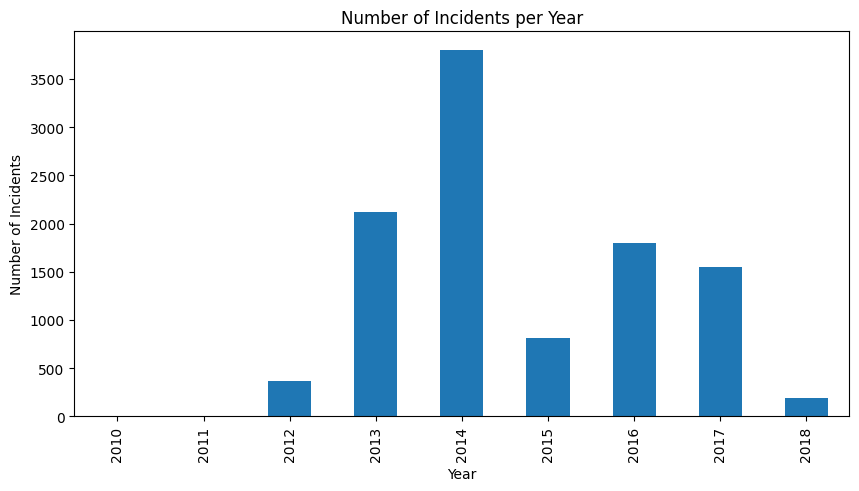

In [ ]:
import matplotlib.pyplot as plt

# Plotting the number of incidents per year
data_cleaned['year'] = data_cleaned['time'].dt.year
incident_per_year = data_cleaned['year'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
incident_per_year.plot(kind='bar')
plt.title('Number of Incidents per Year')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.show()

#### 2.2 Spatial Analysis

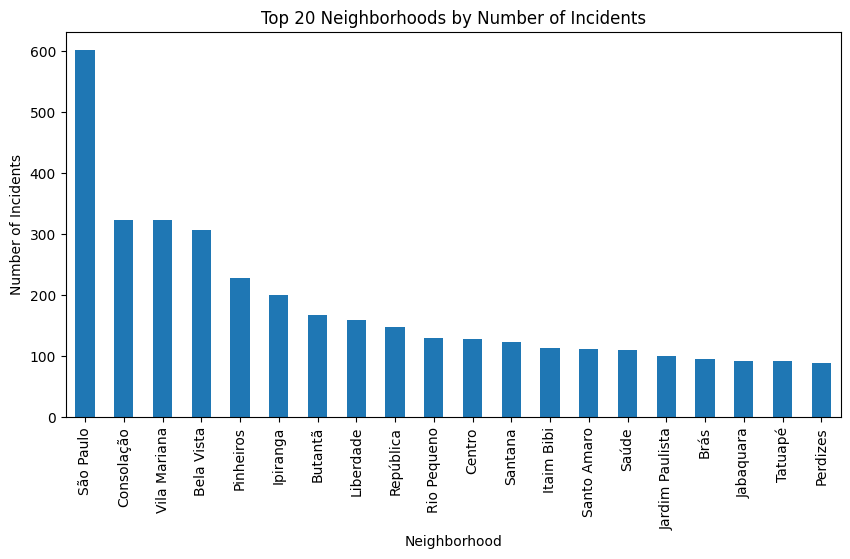

In [ ]:
# Number of incidents per neighborhood
incident_per_bairro = data_cleaned['bairro'].value_counts()

plt.figure(figsize=(10, 5))
incident_per_bairro.head(20).plot(kind='bar')
plt.title('Top 20 Neighborhoods by Number of Incidents')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Incidents')
plt.show()

## Predictive Modeling

### 1. Objective
Forecast the likelihood of being robbed and the value of items stolen in different neighborhoods.

### 2. Feature Engineering

In [8]:
# Extracting features from timestamps
data_cleaned['year'] = data_cleaned['time'].dt.year
data_cleaned['month'] = data_cleaned['time'].dt.month
data_cleaned['day'] = data_cleaned['time'].dt.day
data_cleaned['hour'] = data_cleaned['time'].dt.hour

# Encode categorical variables
data_cleaned = pd.get_dummies(data_cleaned, columns=['bairro', 'titulo'], drop_first=True)

# Prepare target variables
data_cleaned['item_stolen'] = (data_cleaned[['Bicicleta', 'Bolsa ou Mochila', 'Carteira', 'Cartão de Crédito', 
                                             'Celular', 'Computador', 'DVD', 'Dinheiro', 'Documentos', 
                                             'Equipamento de Som', 'Estepe', 'MP4 ou Ipod', 'Móveis', 
                                             'Notebook', 'Outros', 'Relógio', 'Som', 'Tablet', 'Tv']].sum(axis=1) > 0).astype(int)
data_cleaned['item_value'] = data_cleaned[['Bicicleta', 'Bolsa ou Mochila', 'Carteira', 'Cartão de Crédito', 
                                           'Celular', 'Computador', 'DVD', 'Dinheiro', 'Documentos', 
                                           'Equipamento de Som', 'Estepe', 'MP4 ou Ipod', 'Móveis', 
                                           'Notebook', 'Outros', 'Relógio', 'Som', 'Tablet', 'Tv']].sum(axis=1)

# Save processed data for modeling
data_cleaned.to_csv('data_processed.csv', index=False)

### 3. Model Training and Evaluation

#### 3.1 Predict Likelihood of Robbery

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load processed data
data_processed = pd.read_csv('data_processed.csv')

# Features and target for likelihood prediction
X = data_processed.drop(columns=['item_stolen', 'item_value', 'endereco','created_at', 'ip_address_origin','time', 'descricao','registrou_bo'])
y = data_processed['item_stolen']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{report}')

#### 3.2 Predict Value of Items Stolen

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Features and target for value prediction
X = data_processed.drop(columns=['item_stolen', 'item_value', 'endereco','created_at', 'time', 'descricao', 'ip_address_origin','registrou_bo'])
y = data_processed['item_value']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Regressor
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print(f'Mean Squared Error: {mse}')